**22p22c0398**

** Phonratichai wairotchanaphuttha **

**Deapth first search Animation**

In [ ]:
import networkx as nx
import matplotlib.animation as animation
from matplotlib import animation,rc
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
# graph = {
#     "a":["b","c"],
#     "b":["d","e"],
#     "c":["g"],
#     "d":["f"],
#     "e":[],
#     "f":[],
#     "g":[]
# }

graph = {
    1:[2,3,4],
    2:[5,6,7],
    3:[8,9],
    4:[10],
    5:[],
    6:[],
    7:[],
    8:[],
    9:[],
    10:[]
}


In [ ]:
viseted = set()
path = []
save_path = []
def dfs_have_path(graph,path,save_path,node):
  if node not in viseted:
    print(node)
    path = path + [node]
    save_path.append(path)
    print("dfs path =>", save_path)
    for nextnode in graph.get(node):
      dfs_have_path(graph,path,save_path,nextnode)



In [ ]:
dfs_have_path(graph,path,save_path,1)

1
dfs path => [[1]]
2
dfs path => [[1], [1, 2]]
5
dfs path => [[1], [1, 2], [1, 2, 5]]
6
dfs path => [[1], [1, 2], [1, 2, 5], [1, 2, 6]]
7
dfs path => [[1], [1, 2], [1, 2, 5], [1, 2, 6], [1, 2, 7]]
3
dfs path => [[1], [1, 2], [1, 2, 5], [1, 2, 6], [1, 2, 7], [1, 3]]
8
dfs path => [[1], [1, 2], [1, 2, 5], [1, 2, 6], [1, 2, 7], [1, 3], [1, 3, 8]]
9
dfs path => [[1], [1, 2], [1, 2, 5], [1, 2, 6], [1, 2, 7], [1, 3], [1, 3, 8], [1, 3, 9]]
4
dfs path => [[1], [1, 2], [1, 2, 5], [1, 2, 6], [1, 2, 7], [1, 3], [1, 3, 8], [1, 3, 9], [1, 4]]
10
dfs path => [[1], [1, 2], [1, 2, 5], [1, 2, 6], [1, 2, 7], [1, 3], [1, 3, 8], [1, 3, 9], [1, 4], [1, 4, 10]]


In [ ]:
relation_list = []
def make_eages(graph):
 for key in graph.keys():
   for value in graph.get(key):
     b_list = [] 
     b_list.append(key)
     b_list.append(value)
     relation_list.append(b_list)

make_eages(graph)
print("relation_list", relation_list)

relation_list [[1, 2], [1, 3], [1, 4], [2, 5], [2, 6], [2, 7], [3, 8], [3, 9], [4, 10]]


dps_path [1]
dps_path [1]
dps_path [1, 2]
dps_path [1, 2, 5]
dps_path [1, 2, 6]
dps_path [1, 2, 7]
dps_path [1, 3]
dps_path [1, 3, 8]
dps_path [1, 3, 9]
dps_path [1, 4]
dps_path [1, 4, 10]


dps_path [1]


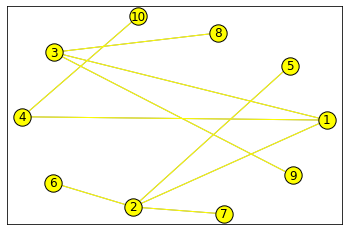

In [ ]:
np.random.seed(56) # lock randome state for creating graph
list_node = list(graph.keys())
edges = relation_list

visited = set() 
visitedEdge = [] 

G = nx.Graph()
G.add_nodes_from(list_node)
pos = nx.spring_layout(G)
for e in edges: #สร้าง edge ในกราฟ
  G.add_edge(e[0],e[1])
fig, ax = plt.subplots(figsize=(6,4))

''' control animation '''
def animate(i):
  ax.clear() #for clear animation 
  print( "dps_path", save_path[i])
  path = save_path[i]
  if len(path) > 0: 
      visited.add(path[-1])
  if len(path) > 1: 
      visitedEdge.append([path[-2],path[-1]])

  # draw not vissit node
  not_visit_nodes = list(set(G.nodes()) - set(path) - visited)
  nx.draw_networkx_edges(G, pos=pos, edgelist=edges, ax=ax, edge_color="gray")
  null_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=not_visit_nodes, node_color="grey",  ax=ax)
  null_nodes.set_edgecolor("Gray")
  nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(not_visit_nodes, not_visit_nodes)),  font_color="white", ax=ax)
  
  #draw vissit node
  nx.draw_networkx_edges(G, pos=pos, edgelist=visitedEdge, ax=ax, edge_color="yellow")
  visited_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=visited, node_color="yellow",  ax=ax)
  visited_nodes.set_edgecolor("black")
  nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(list(visited), list(visited))),  font_color="black", ax=ax)

anim = animation.FuncAnimation(fig, animate, frames=len(save_path), interval=500, repeat=True)
rc('animation', html='jshtml')
anim